# Assignment 3

 In this Assignment, we will use CNN to classify digits.   
The `MNIST` database is a large database of handwritten digits that is commonly used for training various image processing systems.



## Importing TensorFlow

In [21]:
import tensorflow as tf

## Get the dataset

In [22]:
# Import the dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [30]:
# Split the dataset

from sklearn.model_selection import train_test_split
X_val,X_test,Y_val,Y_test=train_test_split(x_test,y_test,test_size=0.2)

## Visualize the dataset
Print some images with labels.

In [31]:
# Pre processing 
import numpy as np

def process(dataset):
    return np.expand_dims((dataset.astype('float32')/255.),axis=3)

x_train_norm = process(x_train)
X_val_norm = process(X_val)
X_test_norm = process(X_test)

Plot statistics of the training and testing dataset  
(`x axis`: digits, `y axis`: number of samples corresponding to the digits)

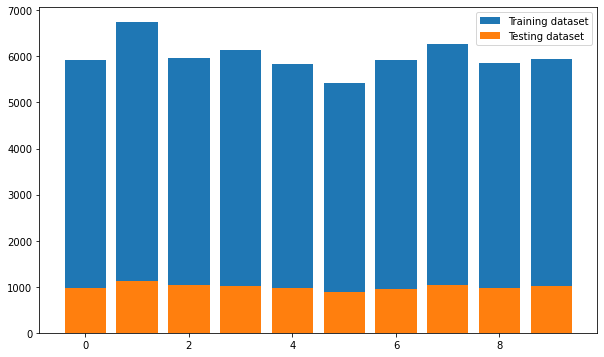

In [32]:
import numpy as np

# Your code
digits = np.arange(10)

plt.figure(figsize=(10,6))

n_digits_train = np.zeros(10)
for i in y_train:
    n_digits_train[i]+=1

plt.bar(digits,n_digits_train)  

n_digits_test = np.zeros(10)
for i in y_test:
    n_digits_test[i]+=1

plt.bar(digits,n_digits_test)  

plt.legend(["Training dataset", "Testing dataset"])
# plt.grid(True)

In [33]:
# model building

# You are supposed to look at some CNN architectures and add convolutional layers along with MaxPooling, specifying the kernel size, pooling size, activation 

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(3,3), input_shape=(28,28,1)),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_1 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_7 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
__________________________________________________

In [34]:
# Compile the model (add optimizers and metrics)
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

# Fit the model on the training data (specify validation_split, read about validation if new to you)

model.fit(
    x_train_norm,
    y_train,
    epochs=10,
    validation_data=(X_val_norm,Y_val),
)

Epoch 1/10
1875/1875 [==============================] - 14s 3ms/step - loss: 0.2077 - sparse_categorical_accuracy: 0.9411 - val_loss: 0.0826 - val_sparse_categorical_accuracy: 0.9755
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0788 - sparse_categorical_accuracy: 0.9771 - val_loss: 0.0719 - val_sparse_categorical_accuracy: 0.9784
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0602 - sparse_categorical_accuracy: 0.9821 - val_loss: 0.0591 - val_sparse_categorical_accuracy: 0.9812
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0495 - sparse_categorical_accuracy: 0.9851 - val_loss: 0.0574 - val_sparse_categorical_accuracy: 0.9799
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0425 - sparse_categorical_accuracy: 0.9872 - val_loss: 0.0533 - val_sparse_categorical_accuracy: 0.9831
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0365 - spar

## Model

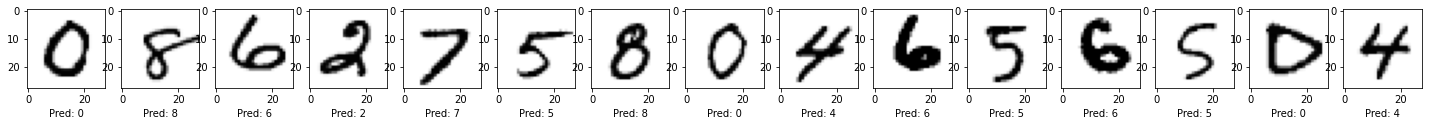

In [35]:
# Your code
p = model.predict(X_test_norm)
pred = np.argmax(p,axis=1)

fig, axis = plt.subplots(1,15,figsize=(25,5))


for i in range(0,15):
    axis[i].imshow(X_test[i], cmap='Greys')
    
for i, ax in enumerate(axis.flat):
    ax.set(xlabel= "Pred: {}".format(pred[i]))

In [36]:
from sklearn.metrics import r2_score

accu = r2_score(Y_test,pred)
print("R2 score: {:.2f}%".format(accu*100))

R2 score: 95.79%


## Predict some images
Print the image along with its label (true value) and predicted value.

In [37]:
loss, acc = model.evaluate(X_test_norm,Y_test)
print("Loss: {:.3f}, Accuracy: {:.2f}%".format(loss,acc*100))

63/63 [==============================] - 0s 3ms/step - loss: 0.0572 - sparse_categorical_accuracy: 0.9845
Loss: 0.057, Accuracy: 98.45%
